# PINGDINDSHAN'S NUMBER 


## FUNKCIJA PDS

In [1]:
#%%cython
# ce ne deluje, odstrani zgornjo vrstico in glej spodaj v funkciji pds!

from sage.combinat.combination import Combinations
from sage.rings.integer import Integer


def count_paths(G, start, end):
    """
    Presteje poti v neusmerjenem grafu ``G`` od ``start`` do ``end``.

    Koda je povzeta po ``sage.graphs.path_enumeration.all_paths``.
    """
    count_paths = Integer(0)
    act_path = []       # the current path
    act_path_iter = []  # the neighbor/successor-iterators of the current path
    s = start
    while True:
        if s == end:    # if path completes, add to count
            count_paths += Integer(1)
        else:
            if s not in act_path:   # we want vertices just once in a path
                act_path.append(s)  # extend current path
                act_path_iter.append(G.neighbor_iterator(s))  # save the state of the neighbor/successor-iterator of the current vertex
        s = None
        while s is None:
            try:
                s = next(act_path_iter[-1])  # try to get the next neighbor/successor, ...
            except (StopIteration):          # ... if there is none ...
                act_path.pop()               # ... go one step back
                act_path_iter.pop()
            if not act_path:                 # there is no other vertex ...
                return count_paths           # ... so we are done


def pds(G):
    """
    Presteje poti v neusmerjenem grafu ``G``.
    """
    count = G.order()
    for u, v in Combinations(G, 2):
        #count += count_paths(G, u, v) # ce ne deluje s %%cython, zakomentiraj to in odkomentiraj naslednjo vrstico
        count += len(G.all_paths(u, v))
    return count
    

## VSI GRAFI

Spodaj je definirana funkcija $ustvari\_vse\_grafe$, ki ustvari vse povezane grafe na $1, \dots ,8$ vozliščih. Funkcija vključi vse neizomorfne grafe.

In [2]:
# Funkcija, ki ustvari generatorje za vse grafe na i = 1,...,12 vozliščih. Generator pomeni,
# da je v pomnilniku le navodilo za ustvarjanje grafa, ne pa celoten graf. Zaradi tega je 
# program hitrejši in porabi manj prostora na pomnilniku. Funkcija vrne 12 generatorjev,
# vsak naj bi vrnil vse grafe na i vozliščih (en generator za vsak i)

def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

gen_vsi_grafi = gen_vsi_grafi()

## FILTRIRANJE GRAFOV IN ISKANJE MAKSIMALNE VREDNOSTI PDS(G)

## VSI GRAFI

In [3]:
# funkcija, ki gre skozi vse grafe na 1, ... , 8 vozliščih, izračuna njihov PDS in nato ustvari slovar, kjer so
# ključi števila vozlišč, vrednost pa je največji PDS za vsakega od vozlišč izmed vseh grafov s tem številom vozlišč

# program se izvaja dobre 3 minute

def max_pds_vsi():
    max_dict_vsi = {}
    for grafi in gen_vsi_grafi:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict_vsi[G.order()] = maks
    return max_dict_vsi

max_dict_vsi = max_pds_vsi()
max_dict_vsi


{1: 1, 2: 3, 3: 9, 4: 34, 5: 165, 6: 981, 7: 6853, 8: 54804}

In [6]:
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

gen_vsi_grafi = gen_vsi_grafi()

In [8]:
def pds_vsi():
    slovar_vsi = {} 
    for grafi in gen_vsi_grafi:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        slovar_vsi[G.order()] = (G, maks)
    return slovar_vsi

pds_vsi = pds_vsi()
pds_vsi

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 9),
 4: (Graph on 4 vertices, 34),
 5: (Graph on 5 vertices, 165),
 6: (Graph on 6 vertices, 981),
 7: (Graph on 7 vertices, 6853),
 8: (Graph on 8 vertices, 54804)}

#### POLNI GRAFI

Najina hipoteza pravi, da več kot ima graf povezav, večje bo njegovo pds število. Da bi se približala potrditvi te najine hipoteze bova pogledala še pds števila polnih grafov na i vozliščih za $i = 1,2, \dots, 8$. Te bova primerjala z maksimalnimi pds števili za vse grafe. 

In [8]:
def slovar_polni_grafi():
    slovar ={}
    for gen in gen_vsi_grafi:
        for g in gen:
            graf = Graph(g)  # Pretvori v SageMath graf
            n = graf.order()  # Število vozlišč
            max_edges = n * (n - 1) // 2  # Število povezav v polnem grafu
            if graf.size() == max_edges:  # Preveri, ali ima maksimalno število povezav
                slovar[graf.order()] = (graf, pds(graf))
    return slovar

slovar_polni_grafi = slovar_polni_grafi()

In [9]:
slovar_polni_grafi

{}

## DVODELNI GRAFI

In [10]:
# funkcija ustvari generatorje dvodelnih grafov in jih shrani v seznam
def gen_dvodelni_grafi():
   gen_dvodelni = []
   for i in range(1, 11):
      gen_dvodelni.append(graphs.nauty_geng(f"{i} -b"))
   return gen_dvodelni

dvodelni_grafi = gen_dvodelni_grafi()
dvodelni_grafi

[<generator object GraphGenerators.nauty_geng at 0x7efb98984430>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984190>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984580>,
 <generator object GraphGenerators.nauty_geng at 0x7efb989846d0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984820>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984970>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984ac0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984c10>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984d60>,
 <generator object GraphGenerators.nauty_geng at 0x7efb98984eb0>]

In [11]:
def max_pds_dvod():
    max_dict_dvod = {}
    for grafi in gen_dvodelni_grafi():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                max_dict_dvod[G.order()] = maks
    return max_dict_dvod

max_dict_dvod = max_pds_dvod()
max_dict_dvod

{1: 1, 2: 3, 3: 6, 4: 16, 5: 38, 6: 141, 7: 445, 8: 2232, 9: 8859, 10: 55735}

In [12]:
# funkcija, ki ustvari slovar z maksimalnimi vrednostmi PDS in pripadajočim dvodelnim grafom

def pds_dvodelni():
    slovar_dvodelni = {}
    for grafi in gen_dvodelni_grafi():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                slovar_dvodelni[G.order()] = (G, pds(G))
    return slovar_dvodelni


slovar_dvodelni = pds_dvodelni()
slovar_dvodelni

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 38),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 445),
 8: (Graph on 8 vertices, 2232),
 9: (Graph on 9 vertices, 8859),
 10: (Graph on 10 vertices, 55735)}

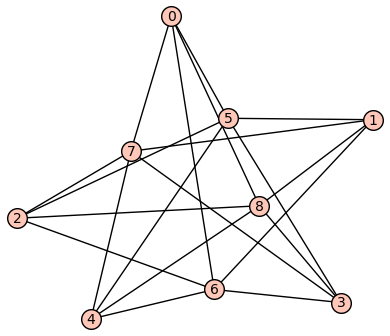

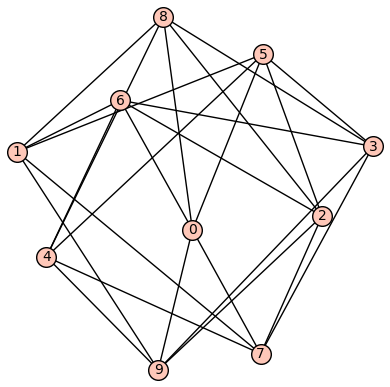

True

In [13]:
G_dvod_9, _ = slovar_dvodelni[9]
G_dvod_9.show()
G_dvod_10, _ = slovar_dvodelni[10]
G_dvod_10.show()	
G_dvod_10.is_triangle_free()

## GRAFI BREZ CIKLOV DOLŽINE TRI

In [14]:
def gen_grafi_brez_trikotnikov():
    gen_brez_trik = []
    for i in range(1, 11):
        gen_brez_trik.append(graphs.nauty_geng(f"{i} -c -t"))
    return gen_brez_trik

grafi_brez_trikotnikov = gen_grafi_brez_trikotnikov()
grafi_brez_trikotnikov

[<generator object GraphGenerators.nauty_geng at 0x7efb965e1540>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1690>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e17e0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1930>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1a80>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1bd0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1d20>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1e70>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e1fc0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb965e2110>]

Naslednja funkcija med grafi poišče max pds v skupini grafov brez trikotnikov.


In [15]:
def max_pds_trik():
    max_dict_trik = {}
    for grafi in gen_grafi_brez_trikotnikov():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
            max_dict_trik[G.order()] = maks
    return max_dict_trik

max_dict_trik = max_pds_trik()

In [16]:
max_dict_trik

{1: 1, 2: 3, 3: 6, 4: 16, 5: 38, 6: 141, 7: 445, 8: 2232, 9: 8859, 10: 55735}

Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 10 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [17]:
# funkcija, ki ustvari slovar z maksimalnimi vrednostmi PDS in grafom

def pds_brez_trikotnikov():
    slovar_brez_trikotnikov = {}
    for grafi in gen_grafi_brez_trikotnikov():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                slovar_brez_trikotnikov[G.order()] = (G, pds(G))
    return slovar_brez_trikotnikov

slovar_brez_trikotnikov = pds_brez_trikotnikov()
slovar_brez_trikotnikov

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 38),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 445),
 8: (Graph on 8 vertices, 2232),
 9: (Graph on 9 vertices, 8859),
 10: (Graph on 10 vertices, 55735)}

#### PRIMERJAVA GRAFOV BREZ TRIKOTNIKOV IN DVODELNIH GRAFOV PRI DOSEGANJU MAKSIMALNIH VREDNOSTI PDS

Kot smo lahko opazili, vsebujeta slovarja grafov brez trikotnikov in dvodelnih grafov enake vrednosti PDS. Poglejmo si še grafe, od katerih je odvisna ta vrednost. Ali so si tudi ti med seboj enaki?

In [18]:
# funkcija preveri ali so vsi grafi, ki so pri obeh skupinah grafov dosegali maksimalne vrednosti PDS med seboj izomorfni in vrne True,
# če pa si katera od grafov med seboj nista enaka vrne False

def preveri_enakost_grafov():
    for i in range(1, 11):
        G_dvod, _ = slovar_dvodelni[i]
        G_brez_trik, _ = slovar_brez_trikotnikov[i]
        if G_dvod.is_isomorphic(G_brez_trik):
            pass
        else:
            return False
    return True

je_enako = preveri_enakost_grafov()
je_enako

True

Kot lahko vidimo, so si prav vsi grafi med seboj izomorfni. Ker pa je množica dvodelnih grafov vsebovana v množici grafov brez trikotnikov, vemo da bo Pingdingshanovo število pri družini grafov brez trikotnikov enako ali kvečjemu večje Pingdingshanovemu številu pri družini dvodelnih grafov. Izkaže pa se, da je za vsako vozlišče natanko enako, kar pomeni, da dvodelni grafi dosegajo maksimalne vrednosti PDS tudi znotraj družine grafov brez trikotnikov.

A zakaj je temu tako? Kakšne so lastnosti dvodelnih grafov, ki jim omogočajo tako veliko PDS število? Zakaj kljub večjim omejitvam dvodelnih grafov (ki izhajajo iz definicije), imajo ti še vedno tako veliko PDS število?

Spodaj je zapisana funkcija, ki preveri ali so ti grafi polni dvodelni.

In [ ]:
def je_polni_dvodelni(G):
    if not G.is_bipartite():
        return False
    # disjunktni množici vozlišč dvodelnega grafa
    disjunktni_mnozici = G.bipartite_sets()
    
    # preveri če je vsako vozlišče iz prve množice povezano z vsakim vozliščem iz druge množice
    for u in disjunktni_mnozici[0]:
        for v in disjunktni_mnozici[1]:
            if not G.has_edge(u, v):
                return False
    return True


# funkcija vrne True, če so vsi grafi polni dvodelni in False sicer
def so_polni_dvodelni():
    for kljuc in slovar_brez_trikotnikov:
        G, _ = slovar_brez_trikotnikov[kljuc]
        if je_polni_dvodelni(G):
            pass
        else:
            return False
    return True

# rezultati
so_polni_dvodelni = so_polni_dvodelni()
so_polni_dvodelni


True

Kot lahko vidimo v zgornji kodi so torej vsi ti grafi polni dvodelni. Torej polni dvodelni grafi tudi v skupini grafov brez trikotnikov dosegajo največjo PDS vrednost. To pa zato, ker imajo polni dvodelni grafi največje možno število povezav, ki ga lahko imajo, da pri tem ne tvorijo nobenega trikotnega cikla. Število teh povezav je enako $m \times n$, kjer je $m$ število vozlišč v prvi disjunktni množici vozlišč dvodelnega grafa, $n$ pa število teh vozlišč v drugi disjunktni množici.

Prav tako je vredno omeniti tudi, da si razreda dvodelnih grafov in grafov brez trikotnikov pravzaprav nista tako različna v velikosti. Kar pomeni, da je velika večina grafov brez trikotnikov tudi dvodelnih, in zato je nekako smiselno, da bodo isti grafi ki dosegajo maksimume $pds$ v skupini dvodelnih grafov, dosegali maksimume tudi v tej skupini.

## KUBIČNI GRAFI

Za kubične grafe velja, da imajo vsa vozlišča v takem grafu stopnjo natanko 3 (pravimo jim tudi 3-regularni grafi). Lastnost kubičnih grafov je tudi, da jih lahko dobimo le na sodo mnogo vozliščih. Spodnji funkciji služita generaciji teh grafov na i vozliščih za $i = 1, \dots , 16$ in štetju vseh poti na teh grafih.

In [23]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 17 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7efb8b0dab90>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0daa40>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0dace0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0dae30>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b004040>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b004190>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0042e0>]

In [24]:
# funkcija, ki izračuna maksimalno št. poti
def max_pds_kub():
    max_dict_kub = {}
    for gen in gen_kub_grafi():
        maks = 0
        for G in gen:
            if pds(G) > maks:
                maks = pds(G)
                max_dict_kub[G.order()] = maks
    return max_dict_kub

max_dict_kub = max_pds_kub()
max_dict_kub

{4: 34, 6: 141, 8: 460, 10: 1375, 12: 3746, 14: 9905, 16: 24664}

In [86]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 17 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7efb8b0d9540>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0d93f0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0d9690>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0d97e0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0d9930>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0d9a80>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0d9bd0>]

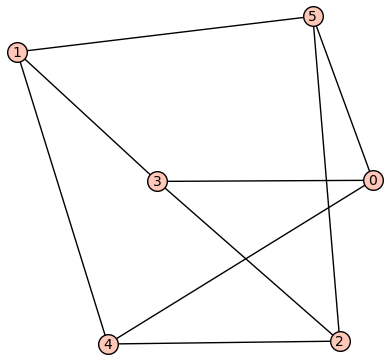

141
False


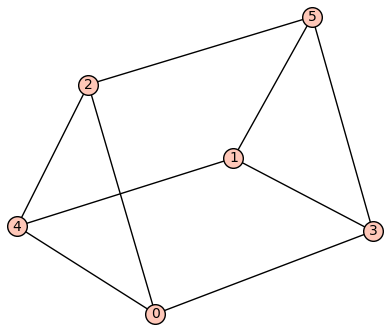

135
True


In [87]:
for g in kub_grafi[1]:
    g.show()
    print(pds(g))
    print(g.is_planar())

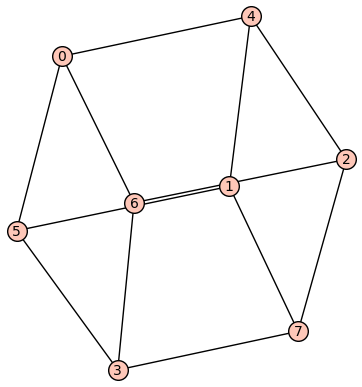

452
True


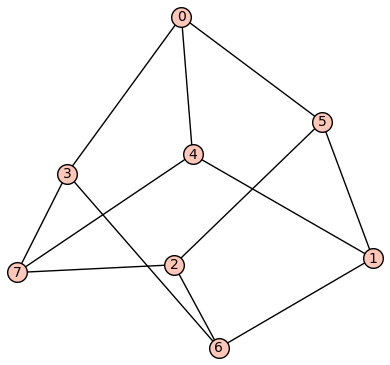

460
False


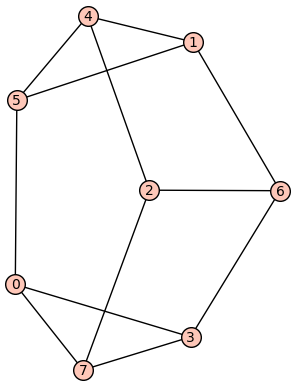

426
True


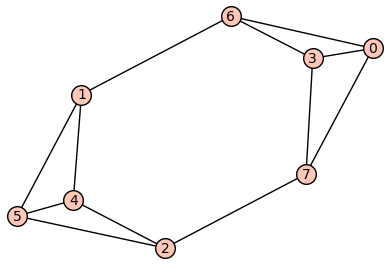

376
True


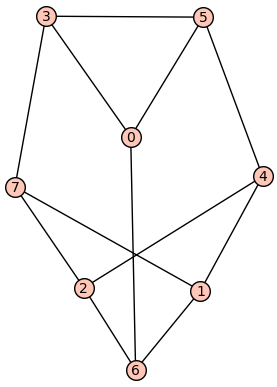

446
False


In [88]:
for g in kub_grafi[2]:
    g.show()
    print(pds(g))
    print(g.is_planar())

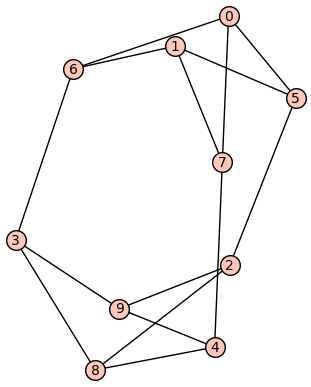

1303
False


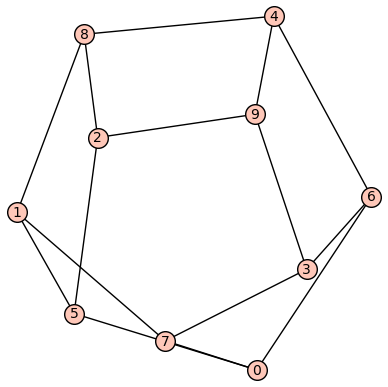

1305
False


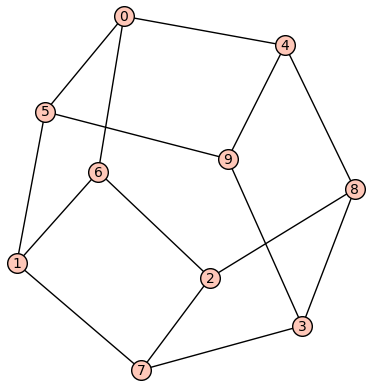

1295
True


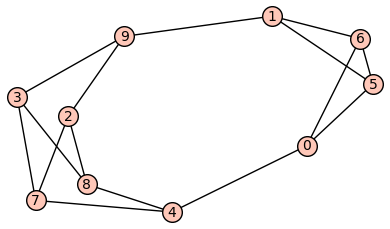

1093
False


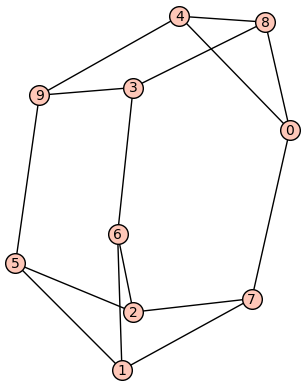

1241
False


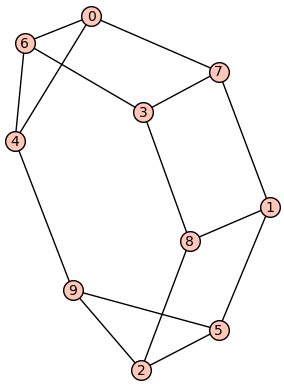

1185
True


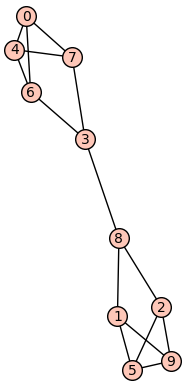

643
True


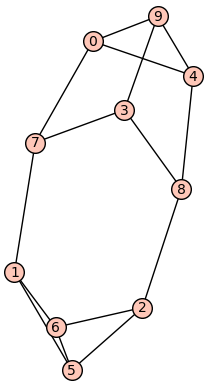

1039
True


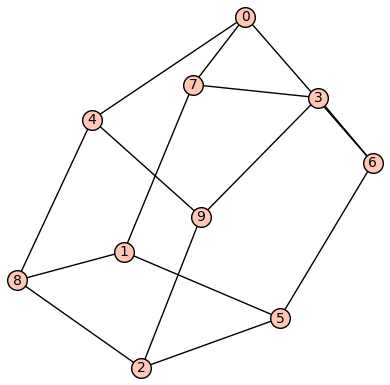

1335
False


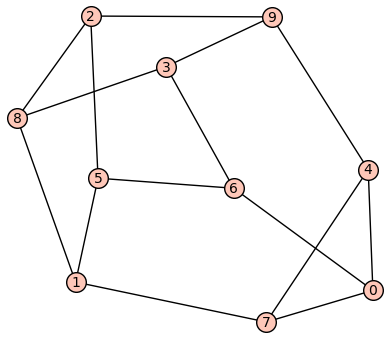

1279
False


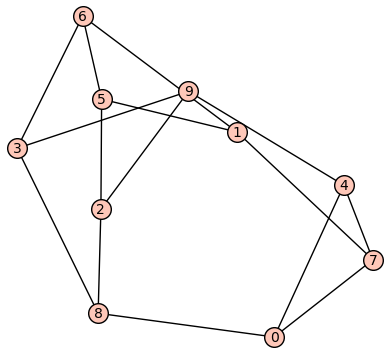

1243
False


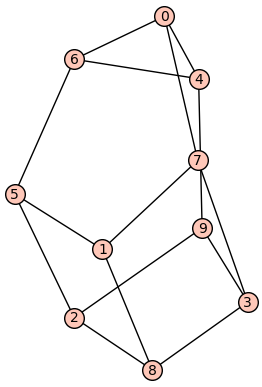

1255
True


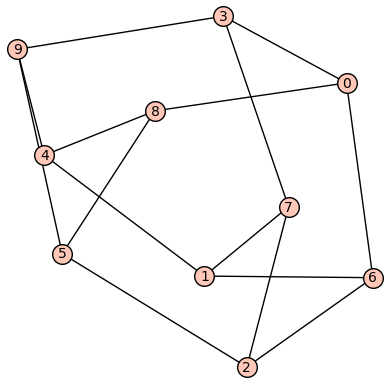

1351
False


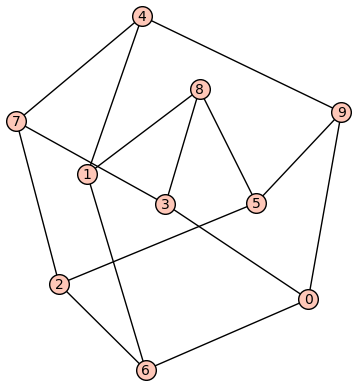

1375
False


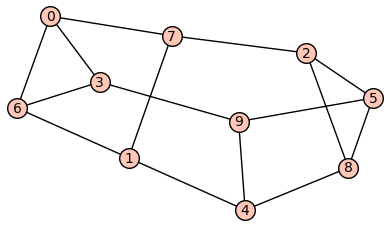

1181
True


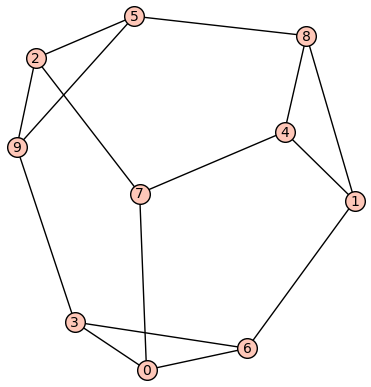

1183
True


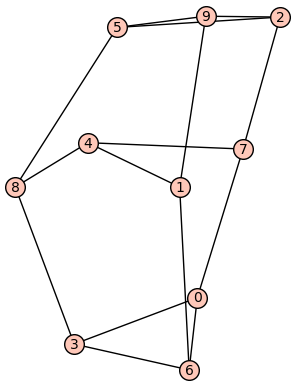

1237
False


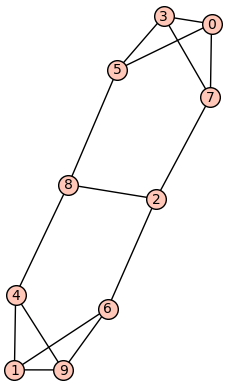

915
True


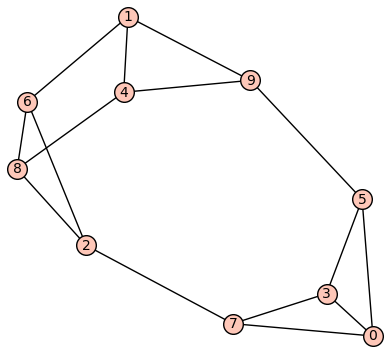

1049
True


In [89]:
for g in kub_grafi[3]:
    g.show()
    print(pds(g))
    print(g.is_planar())

Zgoraj sem izrisala kubične grafe za 6,8,10 vozlišč. Iz izrisanih grafov, njihovih pds-jev in planarnosti sklepam, da neplanarnost grafa zvišuje njegov pds(v slošnem, prizma na 10 vozliščih je planarna in ima večji kot kakšen drug graf na 10 vozliščih, ki ni planaren). Pravtako se zdi, da večja kot bo minimalna prerezna množica povezav večji bo pds (moč te množice nikoli ne bo večja od 3).

In [28]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 17 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7efb8b0052a0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b005150>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0053f0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b005540>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b005690>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b0057e0>,
 <generator object GraphGenerators.nauty_geng at 0x7efb8b005930>]

Želela sem preveriti koliko kubičnih grafov na i vozliščih doseže max pds. izkaže se,da za vsak i obstaja samo en tak graf. Naslednjih par funkcij je namenjeih temu izračunu in izrisu grafov v katerem je dosežen maksimalen pds.

In [29]:
def pds_kub_grafi():
    slovar_kub_grafi = {}
    st_max_grafov= {}
    for gen in kub_grafi:
        for g in gen:
            if pds(g) == max_dict_kub.get(g.order()):
                if g.order() not in slovar_kub_grafi:
                    slovar_kub_grafi[g.order()] = []
                    st_max_grafov[g.order()] = 0

                slovar_kub_grafi[g.order()].append(g)
                st_max_grafov[g.order()] +=1
    return slovar_kub_grafi, st_max_grafov

slovar_kub_grafi, st_max_grafov= pds_kub_grafi()
slovar_kub_grafi
st_max_grafov

{4: 1, 6: 1, 8: 1, 10: 1, 12: 1, 14: 1, 16: 1}

In [72]:
slovar_kub_grafi

{4: [Graph on 4 vertices],
 6: [Graph on 6 vertices],
 8: [Graph on 8 vertices],
 10: [Graph on 10 vertices],
 12: [Graph on 12 vertices],
 14: [Graph on 14 vertices],
 16: [Graph on 16 vertices]}

Iz opazovanja zgoraj izrisanih grafov sem predposatavila, da grafi kjer do dosežen max ne bodo planarni. To sem želela preveriti. Pravtako me je zanimala moč minimalni prereznih možic, vendar nisem našla primerega načina za preverjanje tega pogoja.

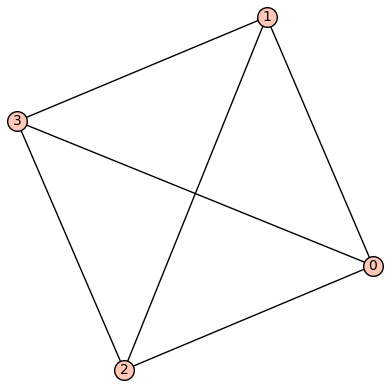

True


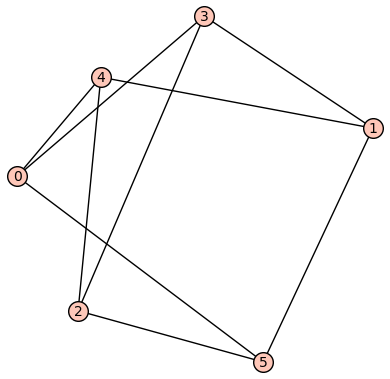

False


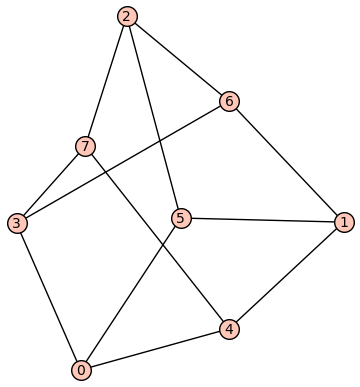

False


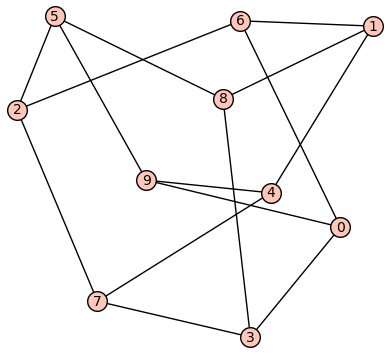

False


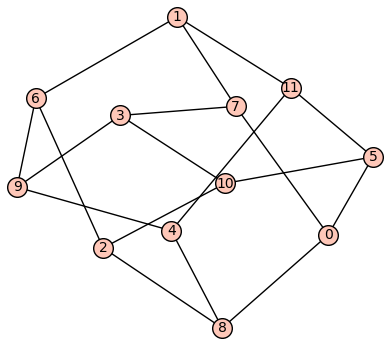

False


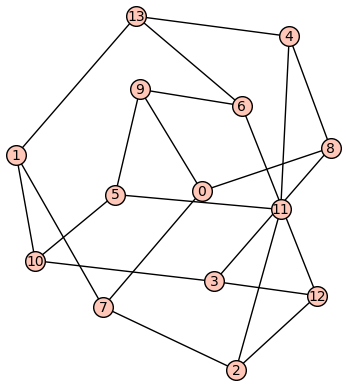

False


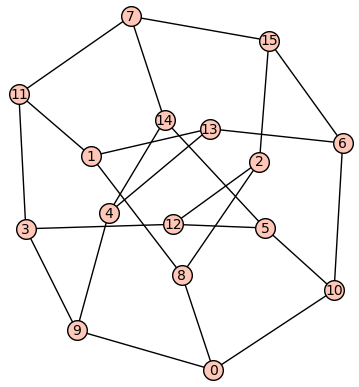

False


In [91]:
# risanje grafov
for i in range(4, 17 ,2):
    kub= slovar_kub_grafi[i][0]
    kub.show()
    print(kub.is_planar())
    


# kub_4 = slovar_kub_grafi[4][0]
# kub_4.show()
# kub_6 = slovar_kub_grafi[6][0]
# kub_6.show()
# kub_8 = slovar_kub_grafi[8][0]
# kub_8.show()
# kub_10 = slovar_kub_grafi[10][0]
# kub_10.show()
# kub_12 = slovar_kub_grafi[12][0]
# kub_12.show()
# kub_14 = slovar_kub_grafi[14][0]
# kub_14.show()
# kub_16 = slovar_kub_grafi[16][0]
# kub_16.show()

Iz zgornjega testa lahko vidimo, da so vsi grafi, pri katerih je dosežen maksimum neplanarni, razen za 4 vozlišča(na štirih vozliščih poznamo le en kubični graf). Hipoteza za višje i, bo potem trdila, da bo tudi pri njih graf z višjim pds-jem neplanaren.

In [41]:
def Prizma(st_vozlisc):
    prizma = graphs.CycleGraph(st_vozlisc//2).cartesian_product(graphs.PathGraph(2))
    return prizma

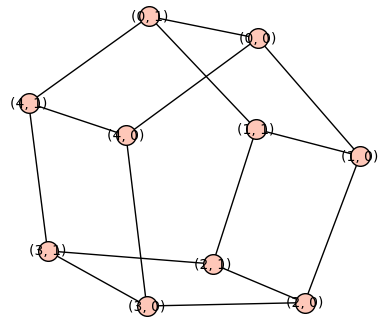

In [47]:
prizma_10= Prizma(10)
prizma_10.show()

In [48]:
kub_10.is_isomorphic(prizma_10)

False

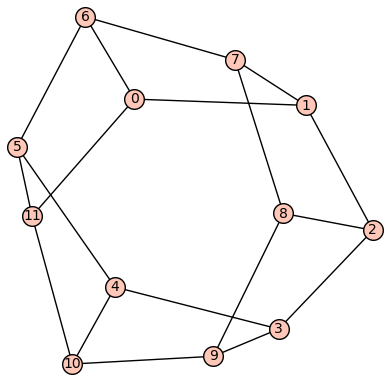

In [57]:
def mobius_band_graph(n):
    if n % 2 != 0:
        raise ValueError("Število vozlišč mora biti sodo.")
    
    G = Graph()
    for i in range(n):
        G.add_edge(i, (i + 1) % n)  # Povezava v krogu
    
    # Dodaj zasuk povezav
    for i in range(n // 2):
        G.add_edge(i, (i + n // 2) % n)  # Povezava nasproti ležečih vozlišč
    
    return G

# Ustvari Möbiusov trak z 6 vozlišči
mobius_trak = mobius_band_graph(12)
mobius_trak.show() 

## POVZETEK PRVE TOČKE


V zgornji kodi sva s pomočjo nauty.geng modula poiskala grafe v posameznih družinah, ki imajo največje število pds. 

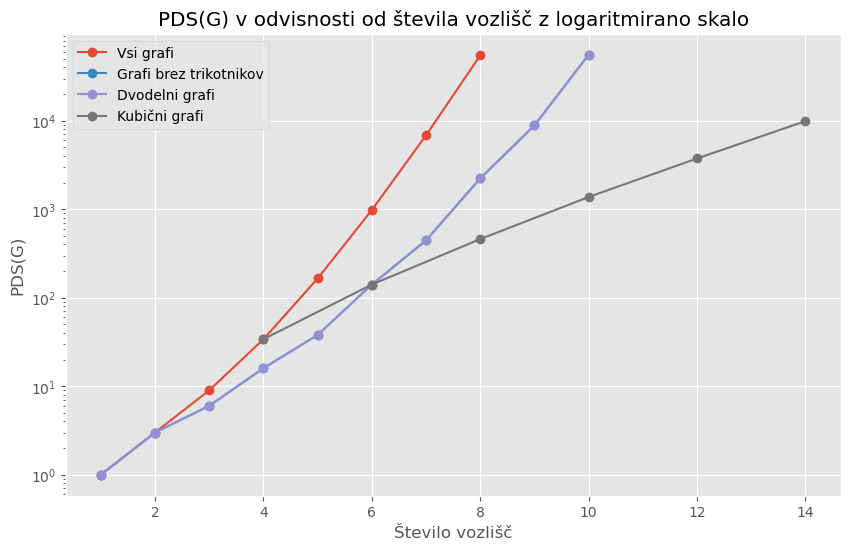

In [33]:
# funkcija za vhodne podatke vzame štiri slovarje, ki vsebuje maksimalno PDS število na vsakem vozlišču
# za vsakega od štirih tipov grafiv, ki sva jih znotraj naloge obravnavala in nato izriše te vrednosti
import matplotlib.pyplot as plt

def graf_pds(vsi, trik, dvod, kub):
    x_1, y_1 = list(vsi.keys()), list(vsi.values())
    x_2, y_2 = list(trik.keys()), list(trik.values())
    x_3, y_3 = list(dvod.keys()), list(dvod.values())
    x_4, y_4 = list(kub.keys()), list(kub.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Vsi grafi')
    plt.plot(x_2, y_2, marker='o', label='Grafi brez trikotnikov')
    plt.plot(x_3, y_3, marker='o', label='Dvodelni grafi')
    plt.plot(x_4, y_4, marker='o', label='Kubični grafi')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('PDS(G)')
    plt.yscale('log')
    plt.title('PDS(G) v odvisnosti od števila vozlišč z logaritmirano skalo') 
    plt.legend()
    plt.grid(True)
    plt.show()
    

graf_pds(max_dict_vsi, max_dict_trik, max_dict_dvod, max_dict_kub)

Za kubične grafe velja, da ima vsako vozlišče stopnjo natanko 3. Iz tega sledi, da je število povezav v kubičnem grafu na i vozliščih natanko 3*i/2 povezav. To se ujema z vrednostmi v slovarju, a je v tem primeru pds število neodvisno od števila povezav v grafu?

## STOHASTIČNA ANALIZA

Stohastične analize se bova lotila tako, da bova grafom z maksimalnim pds-jem odstanila naključno povezavo in opazovala kako se mu spreminja pds. Najina predspostavka namreč je, da več kot ima graf povezav, višji bo njegov pds. Iz te predpostavke bi sledilo, da bodo najvišje pds.je imeli polni grafi na i vozliščih. pogledala bova razmerja med številom povezav in pds-jem v originalnem grafu in v tistem z odstranjeno povezavo.


Naslednja funkcija namenjena odstranitvi naključne povezave v grafu, ki ni most. Zadnji podatek je ključen, da novo dobljeni graf ostane povezan (pds iščemo zgolj na povezanih grafih).

In [23]:
import random
def odstranitev_povezave(graf):
    if not graf.edges():
        return graf
    else:
        mostovi = set(graf.bridges())
        vse_povezave = set(graf.edges())
        ne_most = vse_povezave - mostovi
        if not ne_most:
            return graf
        else:
            nak_pov = random.choice(list(ne_most))
            graf.delete_edge(nak_pov)
            return graf


: 

: 

In [48]:
def stevilo_povezav(slovar):
    slovar_povezav = {}
    for kljuc in slovar.keys():
        graf,maks = slovar[kljuc]
        slovar_povezav[kljuc]= graf.num_edges()
    return slovar_povezav


#### VSI GRAFI

#### DVODELNI GRAFI

Tukaj ponovno napišem funkcijo za generiranje dvodelnih grafov in funkcijo, ki vrne slovar dvodelnih grafov, ker je sicer program vračal napako, saj ni prepoznal vrednosti, ki ju ti dve funkciji vrneta.

In [31]:
def gen_dvodelni_grafi():
   gen_dvodelni = []
   for i in range(1,9):
      gen_dvodelni.append(graphs.nauty_geng(f"{i} -b"))
   return gen_dvodelni

dvodelni_grafi = gen_dvodelni_grafi()
dvodelni_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f8204c03b00>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c02e80>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c03240>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c03d80>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c02c00>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c02480>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c039c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c034c0>]

: 

: 

#### GRAFI BREZ TRIKOTNIKOV 

#### KUBIČNI GRAFI

In [53]:
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

: 

: 